## Import libraries

In [214]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
plt.style.use('seaborn')

plt.rc('font', size=20) #controls default text size
plt.rc('axes', titlesize=20) #fontsize of the title
plt.rc('axes', labelsize=20) #fontsize of the x and y labels
plt.rc('xtick', labelsize=20) #fontsize of the x tick labels
plt.rc('ytick', labelsize=20) #fontsize of the y tick labels
plt.rc('legend', fontsize=20) #fontsize of the legend

# pip install openpyxl xlrd

## Read data from the excel file

In [215]:
xlsfilename = 'cooler_pipe_v2.xlsx'
sheetname = '46HZ_Training'
sheetTeesting = '46HZ_Testing'

In [216]:
df = pd.read_excel(xlsfilename, sheet_name=sheetname) 

In [217]:
timearray = pd.to_datetime(df['time'], format="%Y_%m_%d_%H_%M_%S_%f")
df['time'] = timearray
df['time'] = df['time'].sort_values(ascending=True)
df['time_sec'] = df['time'].dt.minute * 60 + df['time'].dt.second + df['time'].dt.microsecond / 10e5

In [218]:
df

,time,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,time_sec
0,2019-04-30 14:45:00.110,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.11
1,2019-04-30 14:45:00.220,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.22
2,2019-04-30 14:45:00.320,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.32
3,2019-04-30 14:45:00.430,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.43
4,2019-04-30 14:45:00.540,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.54
...,...,...,...,...,...,...,...,...,...,...,...
6120,2019-04-30 14:55:59.490,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.49
6121,2019-04-30 14:55:59.600,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.60
6122,2019-04-30 14:55:59.700,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.70
6123,2019-04-30 14:55:59.810,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.81


<AxesSubplot:xlabel='time'>

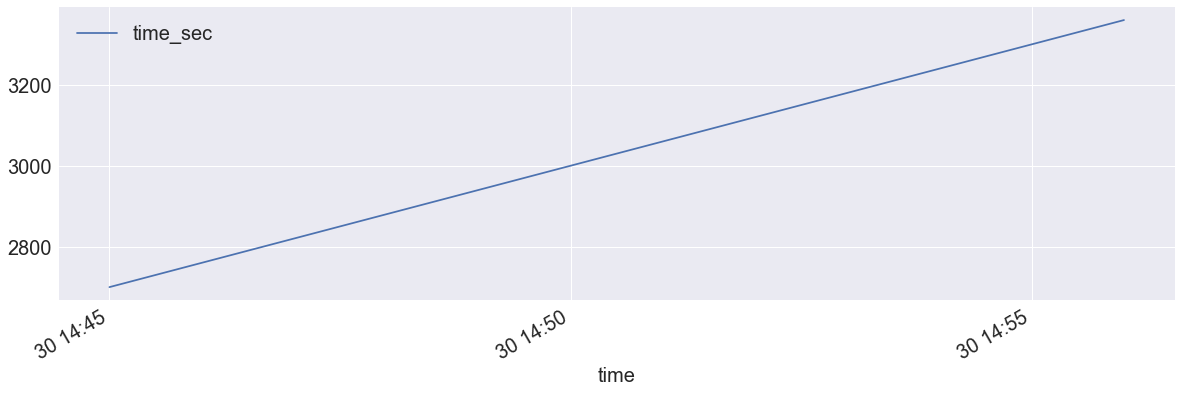

In [219]:
df.plot(x="time",y="time_sec", figsize=(20,6))

<AxesSubplot:xlabel='time'>

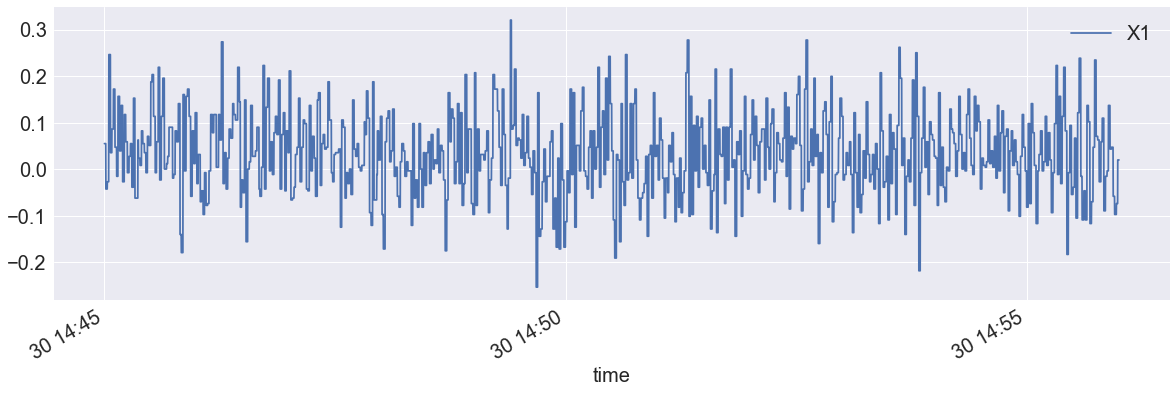

In [220]:
df.plot(x="time",y="X1", figsize=(20,6))

In [221]:
dt = pd.Series(df['time_sec'].diff(), name='dt in seconds')
dt.var()

0.0002597497517952058

In [222]:
dt.value_counts()

0.10    2264
0.11    1835
0.11     705
0.10     548
0.12     338
0.13     130
0.12     108
0.14      46
0.13      42
0.15      40
0.14      20
0.16      11
0.17       9
0.16       7
0.09       5
0.09       5
0.15       4
0.18       2
0.19       2
1.10       1
0.20       1
0.18       1
Name: dt in seconds, dtype: int64

/Users/utpalkumar/miniconda3/envs/data/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


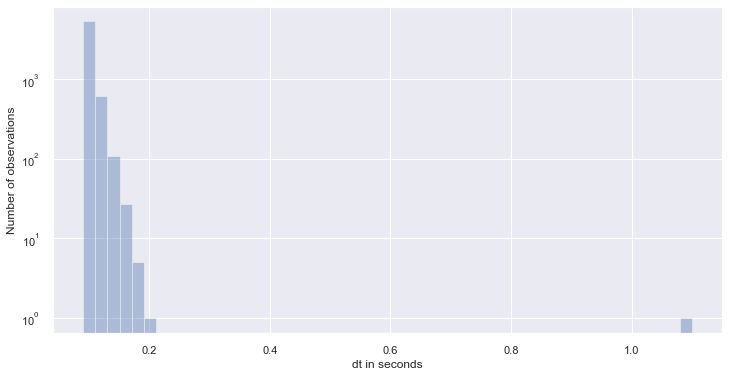

In [223]:
sns.set(rc={'figure.figsize':(12,6)})
ax = sns.distplot(dt, kde=False)
ax.set(yscale="log")
ax.set(ylabel="Number of observations")
plt.savefig('df_distplot.png', dpi=300, bbox_inches='tight')

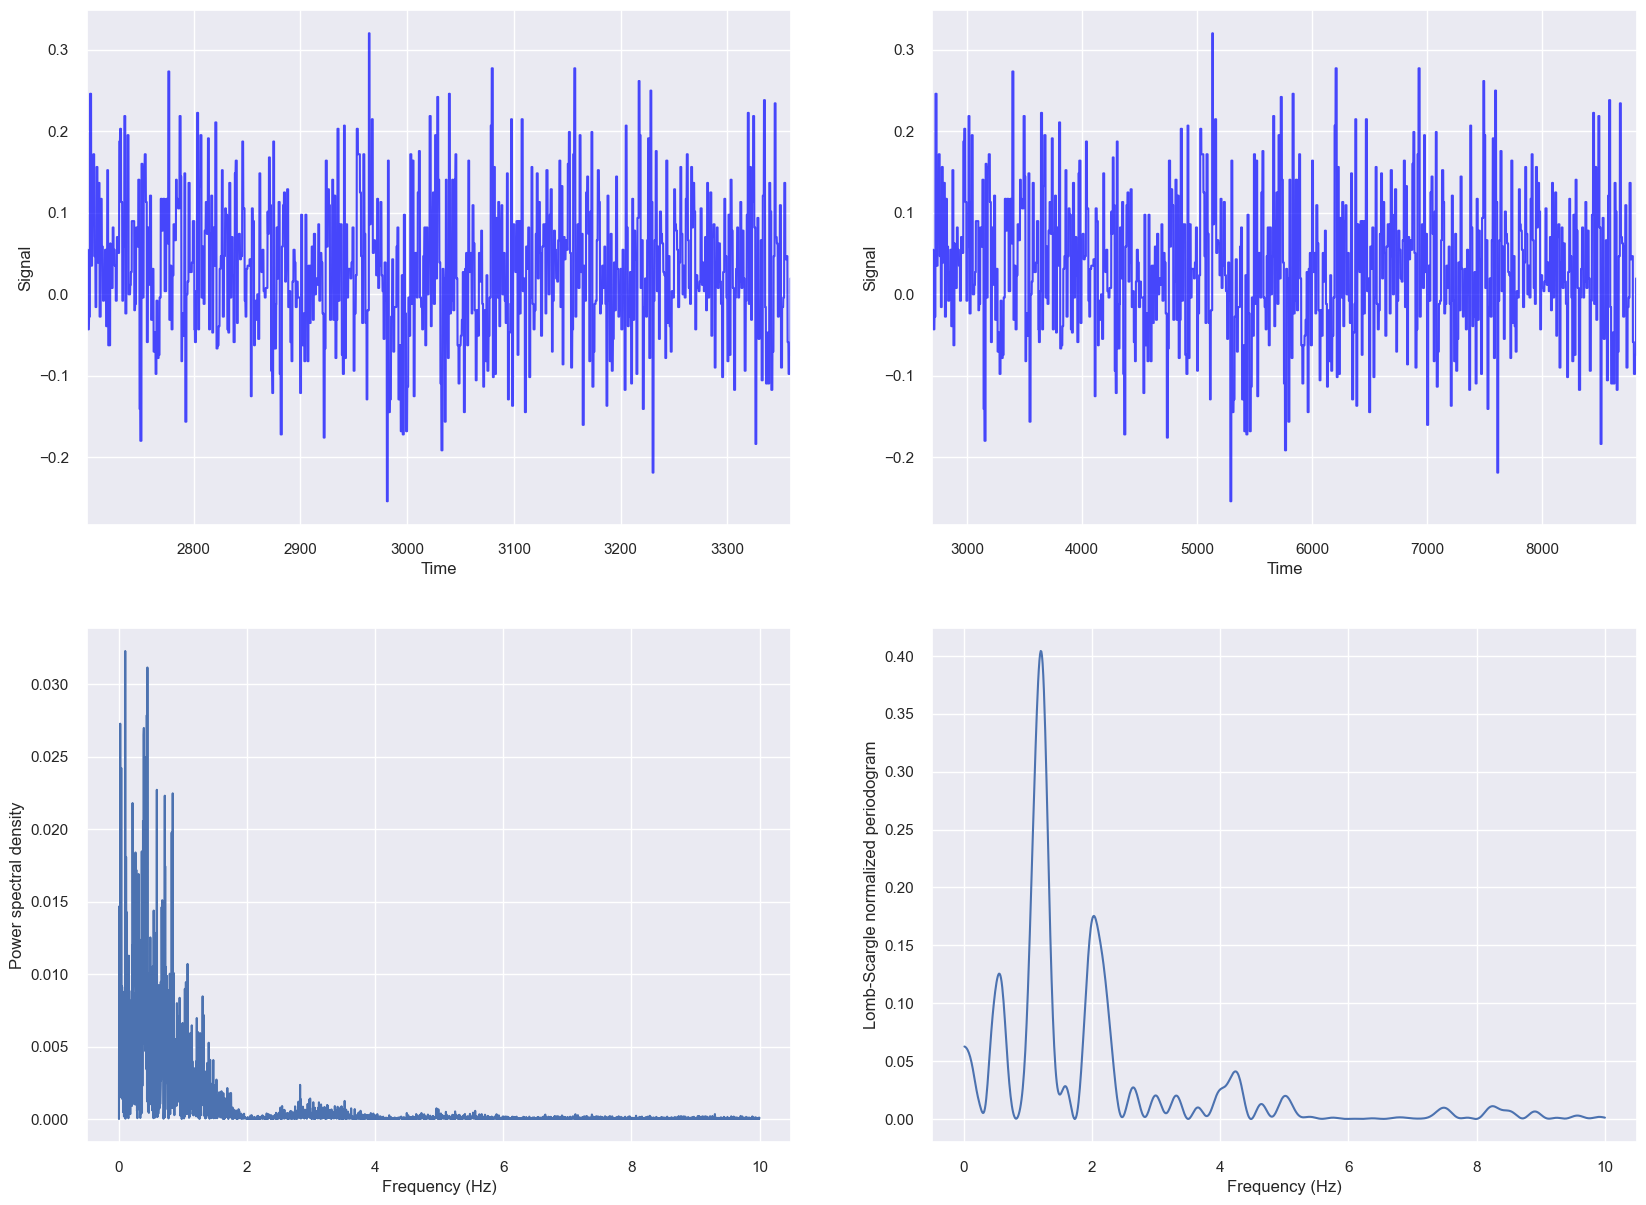

In [224]:
fig, ax_list = plt.subplots(2,2, figsize=(20, 15), dpi=100)

# fig 1
ax=ax_list[0,0]
data = df['X1'].values
t_steps = df['time_sec'].values
ax.plot(t_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((t_steps[0], t_steps[-1]))


# fig 2
ax=ax_list[0,1]
data = df['X1'].values
t_steps0 = df['time_sec'].values
t_steps = np.arange(t_steps0[0], t_steps0[0]+len(data))
ax.plot(t_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((t_steps[0], t_steps[-1]))


# fig 3
ax=ax_list[1,0]
input_signal = df['X1'].values
t_steps = df['time_sec'].values

f, Pxx_den = signal.periodogram(input_signal, fs=20)
ax.plot(f, Pxx_den)
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')

# fig 4
# Plot Lomb-Scargle spectrogram of input signal
ax = ax_list[1,1]
data = df['X1'].values
t_steps = df['time_sec'].values
f = np.linspace(0.01, 10, 1000)
pgram = signal.lombscargle(x, y, f, normalize=True)
ax.plot(f, pgram)
ax.set_ylabel("Lomb-Scargle normalized periodogram")
ax.set_xlabel('Frequency (Hz)')
plt.savefig('periodogram_plot.png', dpi=300, bbox_inches='tight')

## Resample data points

In [225]:
df.set_index('time', inplace=True)
df

,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,time_sec
time,,,,,,,,,,
2019-04-30 14:45:00.110,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.11
2019-04-30 14:45:00.220,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.22
2019-04-30 14:45:00.320,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.32
2019-04-30 14:45:00.430,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.43
2019-04-30 14:45:00.540,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.54
...,...,...,...,...,...,...,...,...,...,...
2019-04-30 14:55:59.490,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.49
2019-04-30 14:55:59.600,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.60
2019-04-30 14:55:59.700,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.70


In [226]:
dfnew = df.resample("100l").last().interpolate(method="nearest")
print(dfnew.shape)
dfnew


(6599, 10)


,X1,Y1,Z1,X2,Y2,Z2,X3,Y3,Z3,time_sec
time,,,,,,,,,,
2019-04-30 14:45:00.100,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.11
2019-04-30 14:45:00.200,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.22
2019-04-30 14:45:00.300,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.32
2019-04-30 14:45:00.400,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.43
2019-04-30 14:45:00.500,0.054688,0.953125,-0.238281,0.144531,0.742188,0.664062,0.039062,0.968750,0.070312,2700.54
...,...,...,...,...,...,...,...,...,...,...
2019-04-30 14:55:59.500,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.49
2019-04-30 14:55:59.600,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.60
2019-04-30 14:55:59.700,0.019531,0.957031,-0.144531,0.042969,0.695312,0.820312,0.074219,0.914062,-0.015625,3359.70


In [227]:
print(f"{dfnew['X1'].diff()[10]:.4f}")

0.0000


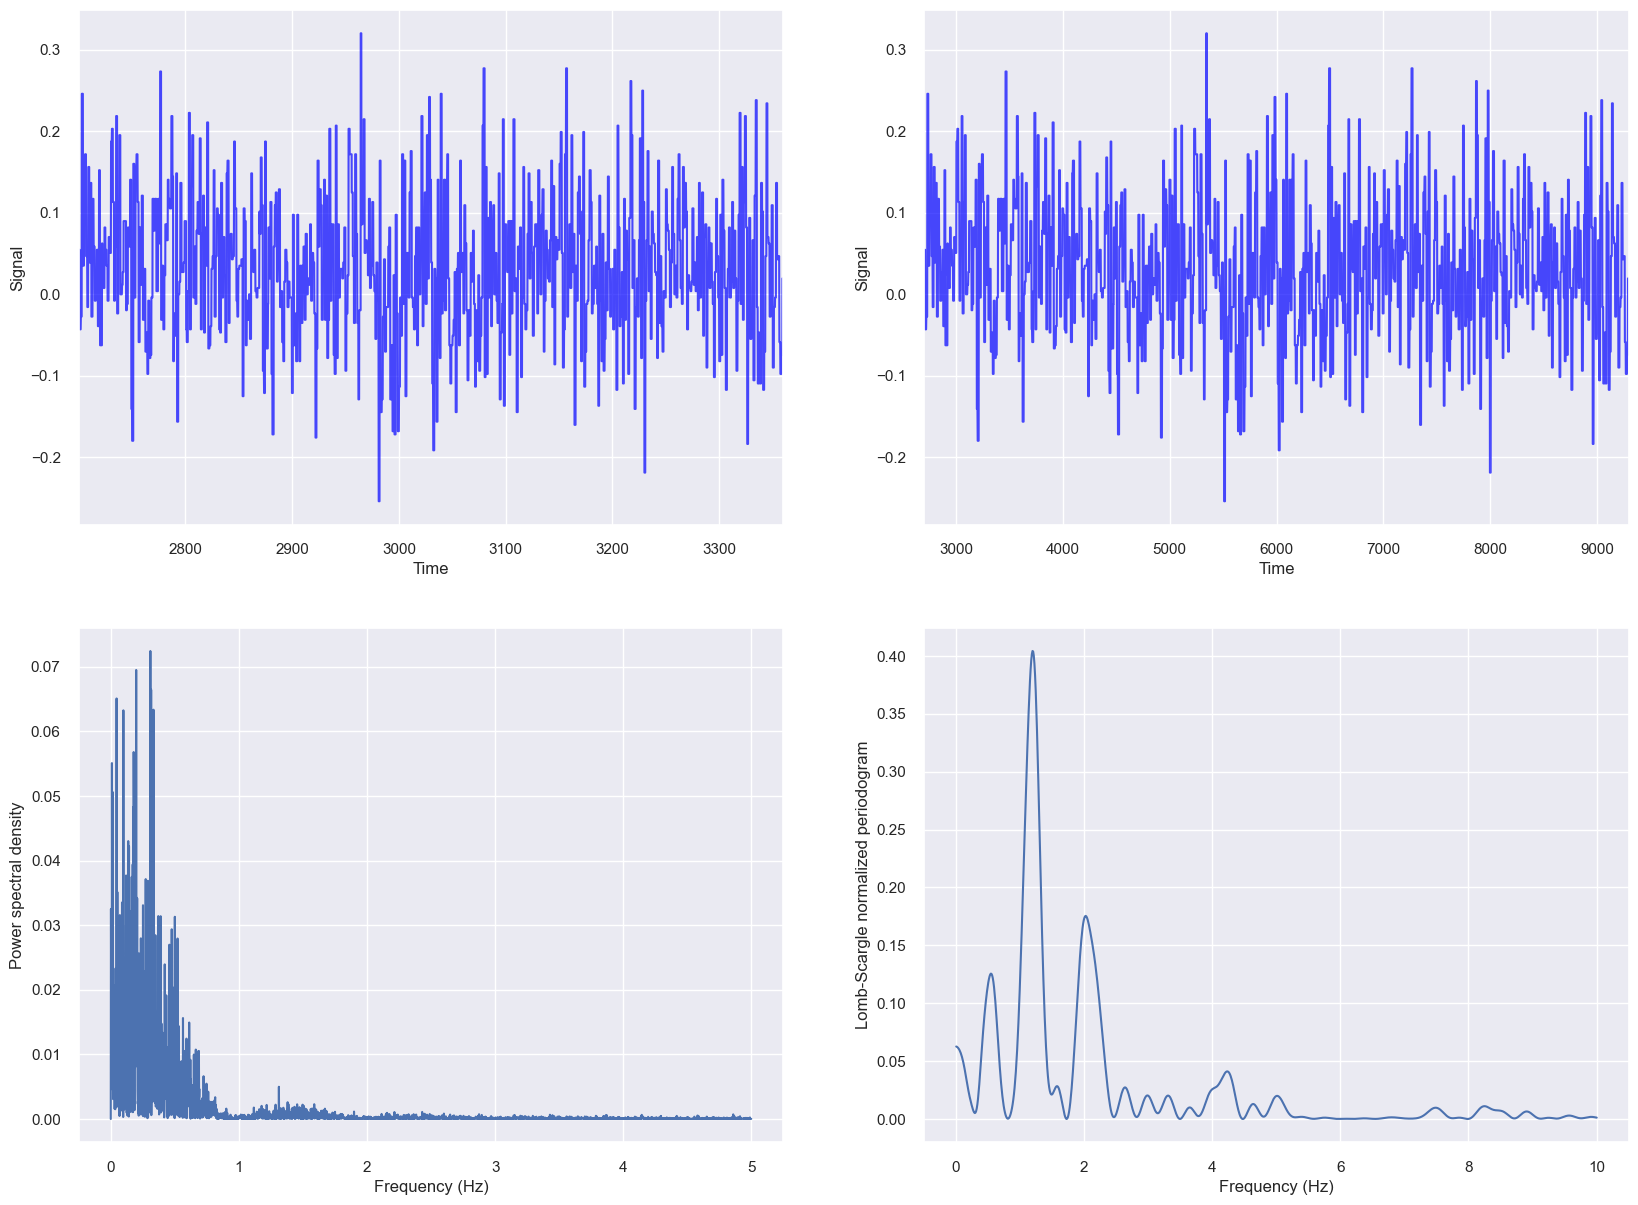

In [228]:
fig, ax_list = plt.subplots(2,2, figsize=(20, 15), dpi=100)

# fig 1
ax=ax_list[0,0]
data = dfnew['X1'].values
t_steps = dfnew['time_sec'].values
ax.plot(t_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((t_steps[0], t_steps[-1]))


# fig 2
ax=ax_list[0,1]
data = dfnew['X1'].values
t_steps0 = dfnew['time_sec'].values
t_steps = np.arange(t_steps0[0], t_steps0[0]+len(data))
ax.plot(t_steps, data, color='blue', alpha=0.7)
ax.set_ylabel("Signal")
ax.set_xlabel("Time")
ax.set_xlim((t_steps[0], t_steps[-1]))


# fig 3
ax=ax_list[1,0]
input_signal = dfnew['X1'].values
t_steps = dfnew['time_sec'].values

f, Pxx_den = signal.periodogram(input_signal, fs=10)
ax.plot(f, Pxx_den)
ax.set_ylabel('Power spectral density')
ax.set_xlabel('Frequency (Hz)')



# fig 4
# Plot Lomb-Scargle spectrogram of input signal
ax = ax_list[1,1]
data = dfnew['X1'].values
t_steps = dfnew['time_sec'].values
f = np.linspace(0.01, 10, 1000)
pgram = signal.lombscargle(x, y, f, normalize=True)
ax.plot(f, pgram)
ax.set_ylabel("Lomb-Scargle normalized periodogram")
ax.set_xlabel('Frequency (Hz)')
plt.savefig('periodogram_plot_evendata.png', dpi=300, bbox_inches='tight')